In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os


In [3]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 50)

In [4]:
#REDUCE MEMORY USAGE
## Function to reduce the DF size
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [5]:
train_df = pd.read_csv(r"E:\Data Science\Kaggle Competitions dataset/train.csv")
test_df = pd.read_csv("E:\Data Science\Kaggle Competitions dataset/test.csv")
building_metadata_df = pd.read_csv("E:\Data Science\Kaggle Competitions dataset/building_metadata.csv")
weather_test_df = pd.read_csv("E:\Data Science\Kaggle Competitions dataset/weather_test.csv")
weather_train_df = pd.read_csv("E:\Data Science\Kaggle Competitions dataset/weather_train.csv")

In [6]:
train_df = reduce_mem_usage(train_df)
test_df = reduce_mem_usage(test_df)
building_metadata_df = reduce_mem_usage(building_metadata_df)
weather_test_df = reduce_mem_usage(weather_test_df)
weather_train_df = reduce_mem_usage(weather_train_df)

Mem. usage decreased to 289.19 Mb (53.1% reduction)
Mem. usage decreased to 596.49 Mb (53.1% reduction)
Mem. usage decreased to  0.03 Mb (60.3% reduction)
Mem. usage decreased to  6.08 Mb (68.1% reduction)
Mem. usage decreased to  3.07 Mb (68.1% reduction)


In [7]:
train_df.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [8]:
type(train_df["timestamp"][0])

str

In [9]:
weather_train_df.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.000000,6.0,20.00000,NaN,1019.5,0.0,0.000000
1,0,2016-01-01 01:00:00,24.406250,NaN,21.09375,-1.0,1020.0,70.0,1.500000
2,0,2016-01-01 02:00:00,22.796875,2.0,21.09375,0.0,1020.0,0.0,0.000000
3,0,2016-01-01 03:00:00,21.093750,2.0,20.59375,0.0,1020.0,0.0,0.000000
4,0,2016-01-01 04:00:00,20.000000,2.0,20.00000,-1.0,1020.0,250.0,2.599609


In [10]:
building_metadata_df.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [11]:
max(train_df["meter_reading"])

21904700.0

In [12]:
train_combined = pd.merge(train_df,building_metadata_df,on='building_id',how='left')
test_combined  = pd.merge(test_df,building_metadata_df,on='building_id',how='left')


In [13]:
train_combined = pd.merge(train_combined,weather_train_df,on=['site_id','timestamp'],how='left')
test_combined  = pd.merge(test_combined,weather_test_df,on=['site_id','timestamp'],how='left')

In [14]:
temp1 = pd.to_datetime(test_combined["timestamp"])
day = temp1.dt.day
day_of_week = temp1.dt.dayofweek
month = temp1.dt.month
year = temp1.dt.year
hour = temp1.dt.hour
minute = temp1.dt.minute
second = temp1.dt.second

In [15]:
test_combined["day"] = day
test_combined["day_of_week"] = day_of_week
test_combined["month"] = month
test_combined["year"] = year
test_combined["hour"] = hour
test_combined["minute"] = minute
test_combined["second"] = second

In [16]:
test_combined.head()

,row_id,building_id,meter,timestamp,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,day,day_of_week,month,year,hour,minute,second
0,0,0,0,2017-01-01 00:00:00,0,Education,7432,2008.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609,1,6,1,2017,0,0,0
1,1,1,0,2017-01-01 00:00:00,0,Education,2720,2004.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609,1,6,1,2017,0,0,0
2,2,2,0,2017-01-01 00:00:00,0,Education,5376,1991.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609,1,6,1,2017,0,0,0
3,3,3,0,2017-01-01 00:00:00,0,Education,23685,2002.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609,1,6,1,2017,0,0,0
4,4,4,0,2017-01-01 00:00:00,0,Education,116607,1975.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609,1,6,1,2017,0,0,0


In [17]:
train_combined.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01 00:00:00,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
1,1,0,2016-01-01 00:00:00,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
2,2,0,2016-01-01 00:00:00,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
3,3,0,2016-01-01 00:00:00,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
4,4,0,2016-01-01 00:00:00,0.0,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0


In [18]:
temp = pd.to_datetime(train_combined['timestamp'])


In [19]:
#temp1 = []
#for i in temp:
#    ts = pd.Timestamp(i)
#    ts.to_pydatetime()
#    temp1.append(ts)
#
#
#train_combined['timestamp'] = temp1

In [20]:
train_combined.shape

(20216100, 16)

In [21]:
del train_df
del test_df 
del building_metadata_df
del weather_test_df
del weather_train_df 


In [22]:
import gc 
gc.collect()

80

In [23]:
day = temp.dt.day
day_of_week = temp.dt.dayofweek
month = temp.dt.month
year = temp.dt.year
hour = temp.dt.hour
#minute = temp.dt.minute
#second = temp.dt.second


In [24]:
train_combined["day"] = day
train_combined["day_of_week"] = day_of_week
train_combined["month"] = month
train_combined["year"] = year
train_combined["hour"] = hour
#train_combined["minute"] = minute
#train_combined["second"] = second

In [25]:
del day
del day_of_week
del month
del year
del hour
del minute
del second
gc.collect()

60

In [26]:
train_combined.shape

(20216100, 21)

In [27]:
train_combined = train_combined.drop("timestamp",axis = 1)

In [28]:
train_combined["floor_count"].nunique()

18

In [29]:
temp = train_combined.isnull().any()
for count,i in enumerate(temp):
    if i== True:
        print(train_combined.columns.values[count])
        print((train_combined[train_combined.columns.values[count]].isnull().sum())/train_combined.shape[0])

year_built
0.5999003269671203
floor_count
0.826527718006935
air_temperature
0.004781238715677109
cloud_coverage
0.43655131306236117
dew_temperature
0.00495347767373529
precip_depth_1_hr
0.18544739094088375
sea_level_pressure
0.06092515371411895
wind_direction
0.0716779200736047
wind_speed
0.007107008770237583


In [30]:
train_combined.shape

(20216100, 20)

In [31]:
import matplotlib.pyplot as plt

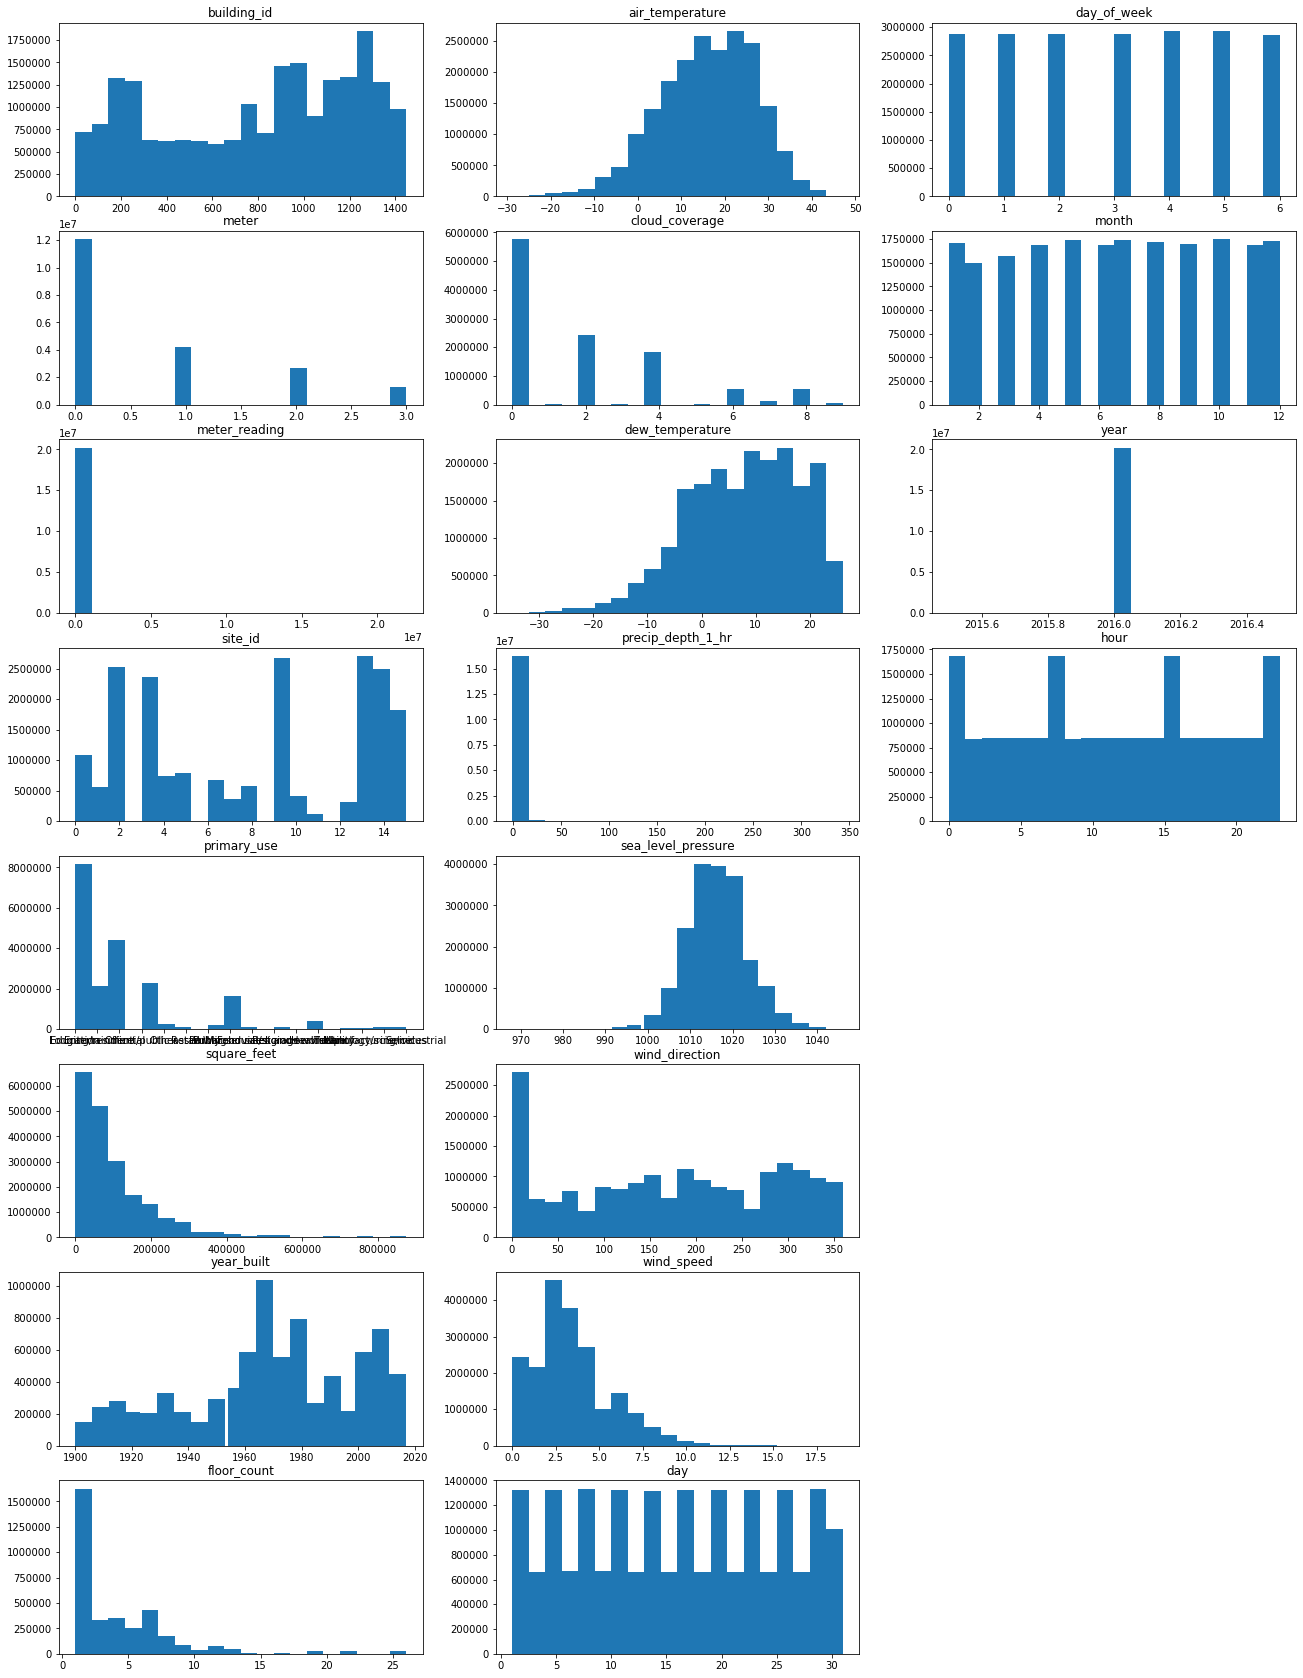

In [32]:
r = 8 # rows
c= 4 #columns
t = 0 #temporary counter
f = plt.figure(figsize=(30,30))
gs = f.add_gridspec(r,c)

for count,i in enumerate(train_combined.columns):
    if count%r==0:
        t=t+1
    f.add_subplot(gs[count%r,t])
    plt.hist(train_combined[i],bins = 20)
    plt.title(i)


In [33]:
train_combined["primary_use"].value_counts()/train_combined.shape[0]

Education                        0.403911
Office                           0.217394
Entertainment/public assembly    0.112035
Lodging/residential              0.106173
Public services                  0.082253
                                   ...   
Warehouse/storage                0.005533
Services                         0.004774
Technology/science               0.003840
Utility                          0.002780
Religious worship                0.001601
Name: primary_use, Length: 16, dtype: float64

In [34]:
train_combined.head()

,building_id,meter,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,day,day_of_week,month,year,hour
0,0,0,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0,1,4,1,2016,0
1,1,0,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0,1,4,1,2016,0
2,2,0,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0,1,4,1,2016,0
3,3,0,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0,1,4,1,2016,0
4,4,0,0.0,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0,1,4,1,2016,0


In [40]:
sum(train_combined["meter_reading"])/train_combined.shape[0]

2117.121076258251

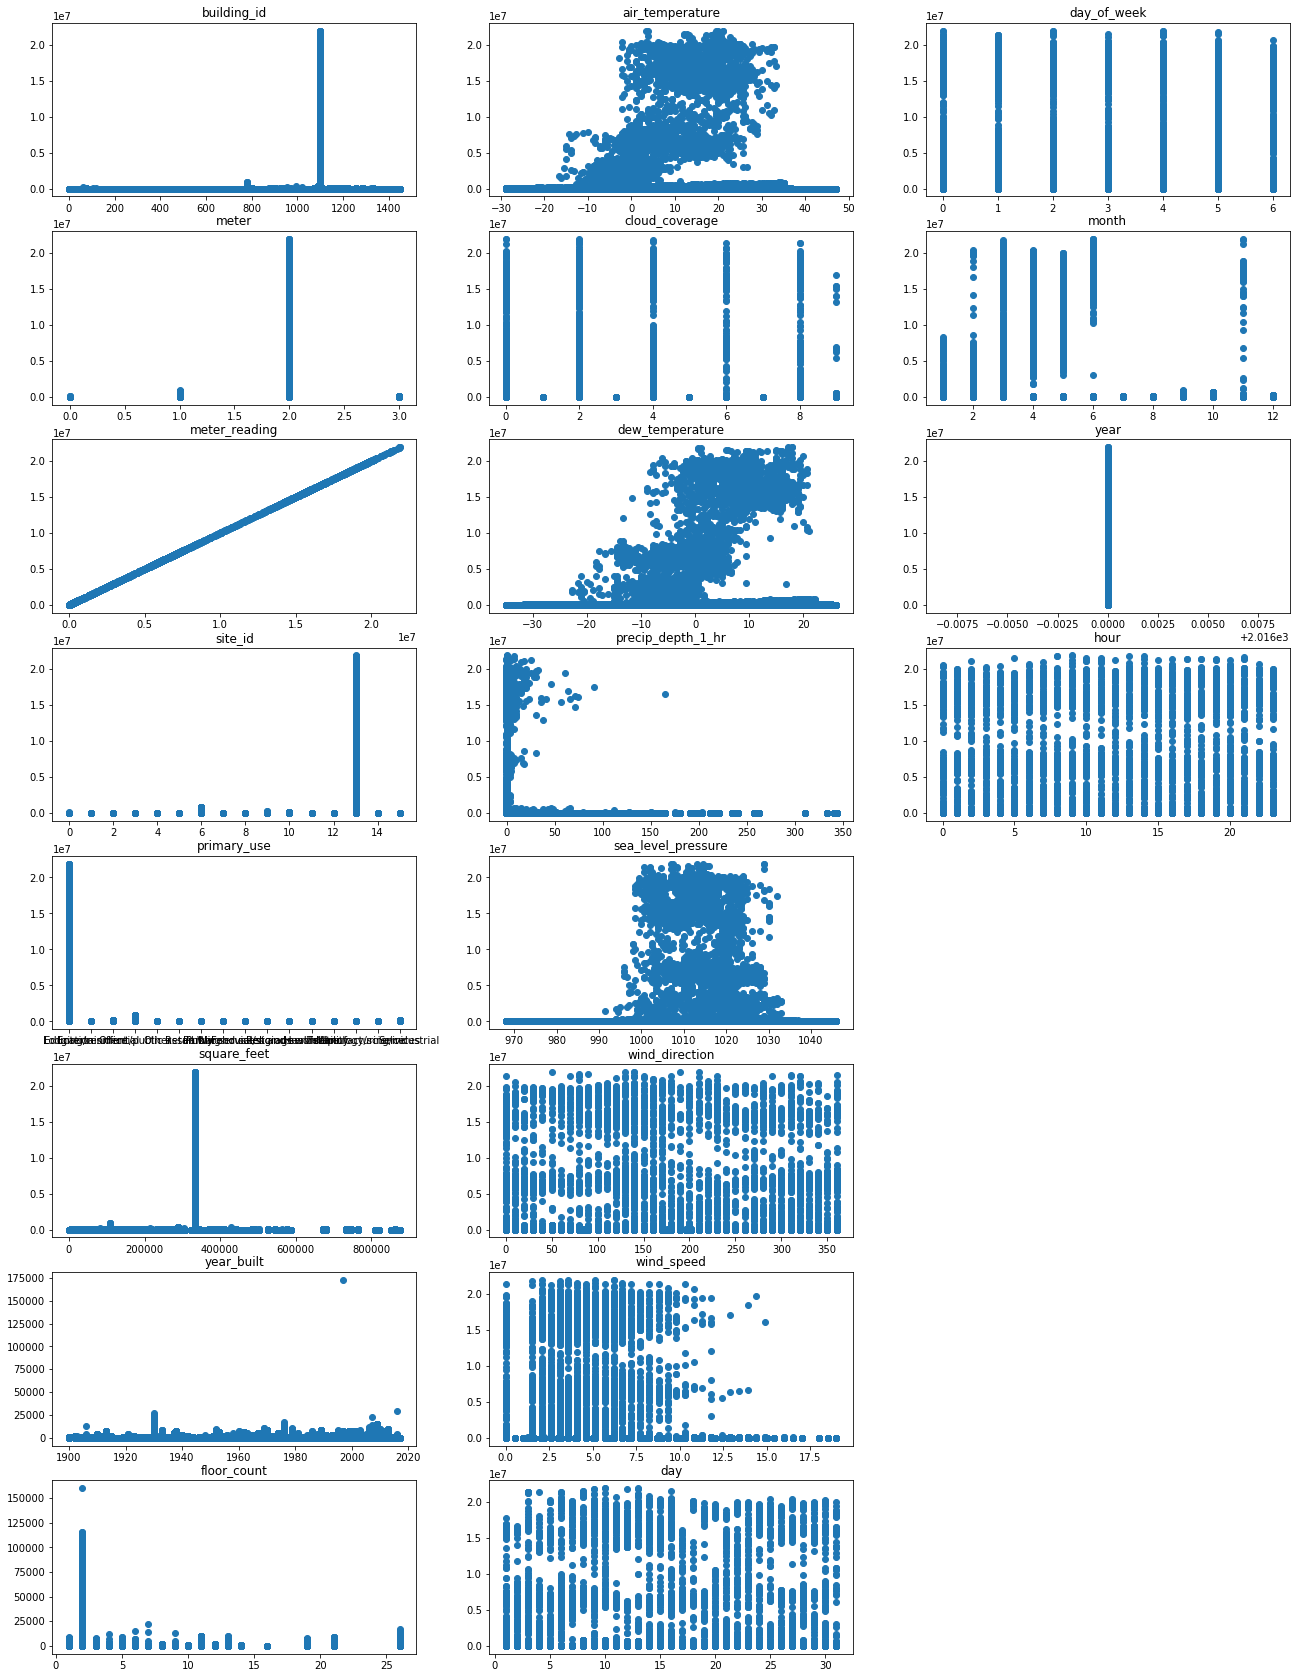

In [41]:
r = 8 # rows
c= 4 #columns
t = 0 #temporary counter
f = plt.figure(figsize=(30,30))
gs = f.add_gridspec(r,c)

for count,i in enumerate(train_combined.columns):
    if count%r==0:
        t=t+1
    f.add_subplot(gs[count%r,t])
    plt.scatter(train_combined[i],train_combined["meter_reading"])
    plt.title(i)

NameError: name 'df' is not defined